TEST: 2017-08-09|EVRI
0.9126813207985465 2017-05-19|DYN

Benchmark: 2017-05-19|DYN


<IPython.core.display.Javascript object>


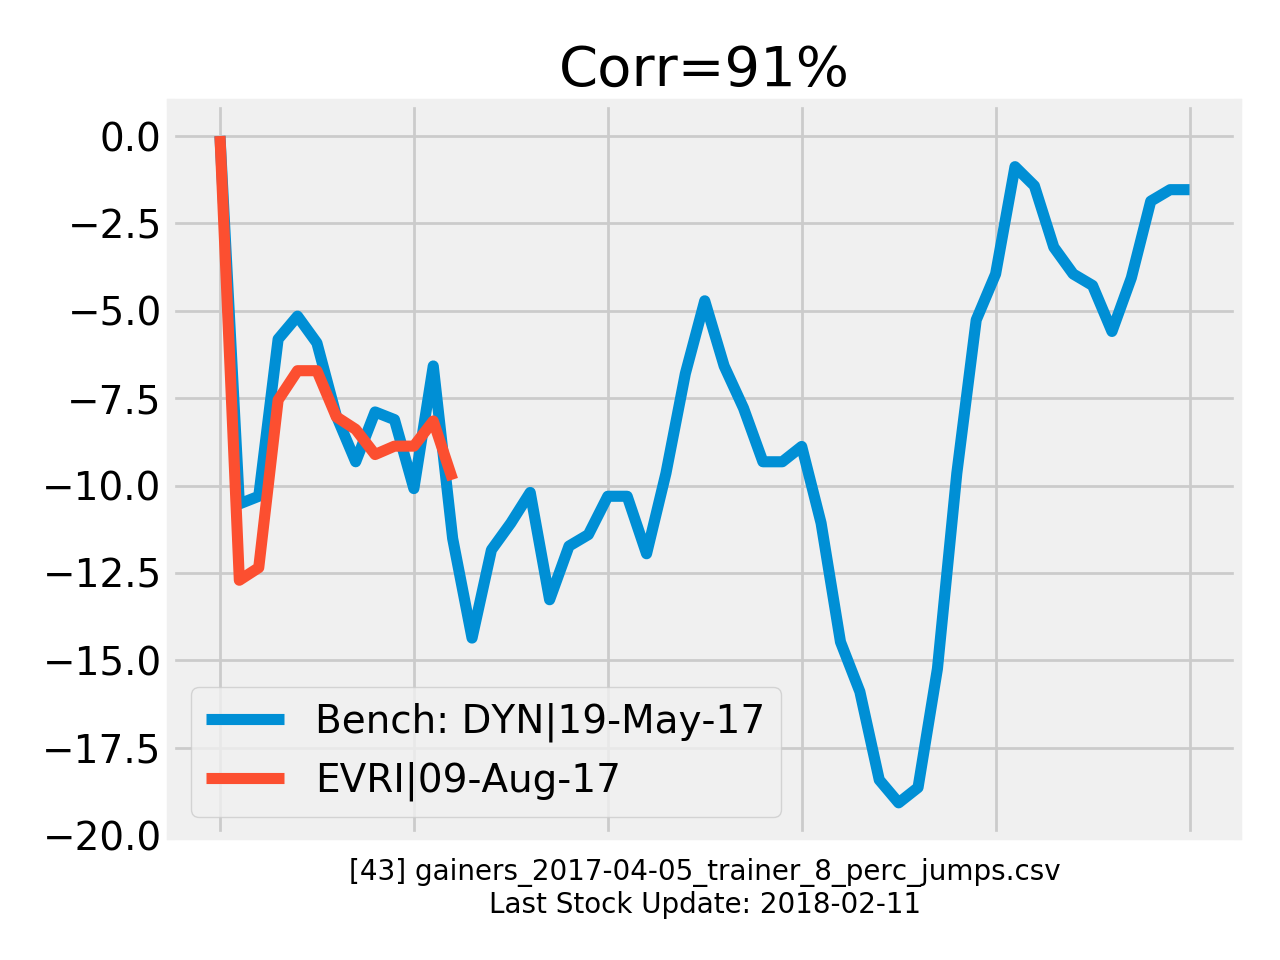

In [2]:
# used to work...now plot won't show up
%matplotlib notebook

from datetime import datetime, timedelta
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('fivethirtyeight')

api_key = 'kgMN5tuNUwb7-F29s6xp' 

def corr_data(stock_num):
    ##----------TRAINING DATA
    main_df = pd.DataFrame()
    
    #file = 'losers_2017_05_06_trainer_8_perc.csv'
    file = 'gainers_2017-04-05_trainer_8_perc_jumps.csv'
    df = pd.read_csv('data/training_data/'+file)
    df = df.set_index('Index').T

    for column in df:    
        main_df[column] = (df[column] - df[column].iloc[0]) / df[column].iloc[0] * 100

    #CURRENT
    df2= main_df
    df3 = pd.DataFrame()
    main_df3 = pd.DataFrame()
    df_corr_results = pd.DataFrame()
    main_df_corr_results = pd.DataFrame()
    main_plot = pd.DataFrame()

    #---------THE FILES TO ANALYZE
    #df3 = pd.read_csv('gainers-loser/daily_exports/file 4-2017.csv')
    train1 = pd.read_csv('data/daily_exports/gainers_2017_08_03_04_05_06_07_08_09_10_11.csv')
    #train1 = pd.read_csv('data/daily_exports/gainers_2017-05-24-25-26.csv')
    train1 = train1.set_index('Index').T

    #-------main training data
    df3 = train1
    for column in df3:    
        main_df3[column] = (df3[column] - df3[column].iloc[0]) / df3[column].iloc[0] * 100

    #---------------------------------------
    #---------------------------------------pick a stock
    #stock_num = 15
    #---------------------------------------
    #---------------------------------------pick a stock
    #num_days = 40 # used in future only
    analyze_stock_text = df3.columns.values[stock_num]
    x1 = main_df3[analyze_stock_text] # convert selected stock to series so you can coorilate
    analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text]) #convert into df to use to plot

    #below was for testing when future is needed
    # analyze_plots = pd.DataFrame(data=main_df3[analyze_stock_text][:num_days]) #convert into df to use to plot
    # num_days = num_days - 1 #reset line start to match with current line
    # analyze_plots_future = pd.DataFrame(data=main_df3[analyze_stock_text][num_days:]) # Get future results
    #---------pick a stock

    # correlate selected stock to all test data stocks
    df_corr_results = df2.corrwith(x1)
    main_df_corr_results = df_corr_results.sort_values(ascending=False)
    main_df_corr_results = pd.DataFrame({'Stock':main_df_corr_results.index, 'Corr':main_df_corr_results.values}) #turns series into a dataframe

    d = datetime.today() - timedelta(days=1) # today's day  minus one for plot display

    first_loop = 0 #FOR TELLING IF THERE ARE ANY STOCKS TO ANALYZE

    for index, row in main_df_corr_results.iterrows(): # loop each value of main_df_corr...

        if row['Corr'] >= .85:

            first_loop = 1
            
            # adjust plot titles
            #bench
            benchmark_stock_text = row['Stock']
            bench_date, bench_stock = benchmark_stock_text.split('|')
            date_object = datetime.strptime(bench_date, '%Y-%m-%d')
            bench_date = date_object.strftime('%d-%b-%y')
            title_benchmark_stock_text = bench_stock+'|'+bench_date
            
            #other
            analy_date, analy_stock = analyze_stock_text.split('|')
            date_object = datetime.strptime(analy_date, '%Y-%m-%d')
            analy_date = date_object.strftime('%d-%b-%y')
            title_analyze_stock_text = analy_stock+'|'+analy_date
            
            

            #show correlated values
            print('TEST: '+str(analyze_stock_text))
            print (row['Corr'], row['Stock'])
            print()

            #---------pick a benchmark
            print('Benchmark: '+str(benchmark_stock_text))
            benchmark_plots = pd.DataFrame(data=df2[benchmark_stock_text]) #loopup benchmark data using TEXT
            #---------pick a benchmark

            # plot data
            main_plot['Bench: '+title_benchmark_stock_text] = benchmark_plots[benchmark_stock_text]
            main_plot[''+title_analyze_stock_text] = analyze_plots[analyze_stock_text]
            #main_plot['Future:'+analyze_stock_text] = analyze_plots_future # uncomment for future
            main_plot.plot()
            corr = int(row['Corr'] * 100)
            plt.title('Corr='+ str(corr)+'%')
            plt.xlabel('['+str(stock_num)+'] '+file+'\nLast Stock Update: '+d.strftime('%Y-%m-%d'), fontsize=10)
            plt.tight_layout() # make room for lables
            plt.show() # you can also use plt.show()

            del main_plot['Bench: '+title_benchmark_stock_text] # delete line from PLOT
            del main_plot[title_analyze_stock_text]
            #del main_plot['Future:'+analyze_stock_text] # uncomment for future
        else: # if row['Corr'] >= .80
            if first_loop == 0:
                print('NO STOCKS TO ANALYZE')
            break

corr_data(43)